# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [2]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,245,93,41,75,124,51,7,140,49,18,141,164,284,149,77,5,15,184,185
1,817,104,53,108,204,64,11,220,31,25,172,226,707,203,71,14,30,189,203
2,231,85,33,40,115,57,3,112,61,17,119,130,184,127,86,12,21,181,183
3,553,86,45,66,126,57,8,148,46,19,145,170,321,186,86,0,7,179,182
4,471,104,55,109,230,67,12,218,30,24,174,230,706,226,67,8,22,191,202
5,605,97,53,105,225,71,12,221,30,25,167,226,713,202,70,3,20,186,200
6,56,97,44,96,195,63,9,185,36,22,144,202,512,165,66,4,8,191,199
7,425,89,36,69,142,57,7,135,50,18,126,154,266,128,66,3,36,193,203
8,424,91,41,93,197,65,9,183,36,21,137,202,504,153,66,11,24,193,200
9,663,89,47,83,169,61,8,164,40,20,150,189,402,190,72,7,10,187,193


Methods `describe` and `info` deliver some useful information.

In [3]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,421.211293,93.677596,45.016393,82.309654,169.759563,61.969035,8.693989,168.928962,40.919854,20.599271,148.377049,188.744991,440.473588,175.400729,72.284153,6.335155,12.606557,189.107468,195.952641
std,243.293999,8.118189,6.171641,15.748326,33.533790,8.047359,4.869574,33.301494,7.792996,2.599775,14.543476,31.441705,176.794650,32.445345,7.578985,4.927639,9.055488,6.086760,7.376324
min,0.000000,77.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,212.000000,87.000000,40.000000,70.000000,143.000000,57.000000,7.000000,146.000000,33.000000,19.000000,138.000000,168.000000,318.000000,151.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,418.000000,93.000000,45.000000,80.000000,168.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,363.000000,174.000000,71.000000,5.000000,11.000000,189.000000,197.000000
75%,631.000000,100.000000,50.000000,98.000000,195.000000,65.000000,10.000000,200.000000,46.000000,23.000000,159.000000,217.000000,600.000000,199.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,40.000000,206.000000,211.000000


In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

__Что видим сразу?__

- все значения в X числовые, one hot encoding не нужен
- NA отсутствуют

Поглядим на матрицу корреляции признаков:

In [5]:
corr_matr = X_train_pd.corr()
corr_matr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.000000,0.038412,0.011066,0.002211,-0.010705,-0.087786,-0.022999,0.035502,-0.026548,0.035456,0.008470,0.013941,0.033456,-0.006282,-0.027262,-0.019051,0.038577,0.012163,0.013018
1,0.038412,1.000000,0.701477,0.809796,0.698214,0.086577,0.135565,0.818015,-0.795350,0.819319,0.680207,0.762877,0.823098,0.589669,-0.253809,0.216465,0.181934,0.270584,0.361585
2,0.011066,0.701477,1.000000,0.800090,0.634169,0.155871,0.227804,0.862165,-0.832750,0.858860,0.963704,0.810741,0.855143,0.933331,0.072698,0.147309,0.000703,-0.143641,0.016532
3,0.002211,0.809796,0.800090,1.000000,0.771971,0.149667,0.243975,0.911552,-0.915889,0.900066,0.777841,0.861766,0.894668,0.701599,-0.212351,0.098223,0.289942,0.116444,0.312686
4,-0.010705,0.698214,0.634169,0.771971,1.000000,0.658550,0.457487,0.737088,-0.785714,0.712323,0.577264,0.811222,0.726131,0.552414,-0.128914,0.041735,0.192437,0.335298,0.435457
5,-0.087786,0.086577,0.155871,0.149667,0.658550,1.000000,0.668408,0.091502,-0.162493,0.066655,0.129310,0.294236,0.079498,0.141449,0.223015,-0.028683,-0.028239,0.198225,0.232228
6,-0.022999,0.135565,0.227804,0.243975,0.457487,0.668408,1.000000,0.149754,-0.162074,0.142078,0.288803,0.328131,0.129294,0.169775,0.332006,0.010974,0.048538,-0.034843,0.140218
7,0.035502,0.818015,0.862165,0.911552,0.737088,0.091502,0.149754,1.000000,-0.974898,0.992444,0.812954,0.942997,0.996403,0.798101,-0.026505,0.049753,0.224117,-0.029707,0.101292
8,-0.026548,-0.795350,-0.832750,-0.915889,-0.785714,-0.162493,-0.162074,-0.974898,1.000000,-0.953536,-0.779123,-0.931360,-0.958759,-0.767310,0.096288,-0.030330,-0.203126,-0.067796,-0.188949
9,0.035456,0.819319,0.858860,0.900066,0.712323,0.066655,0.142078,0.992444,-0.953536,1.000000,0.814534,0.929268,0.992528,0.793939,-0.020049,0.060358,0.229471,-0.049628,0.084175


<AxesSubplot:>

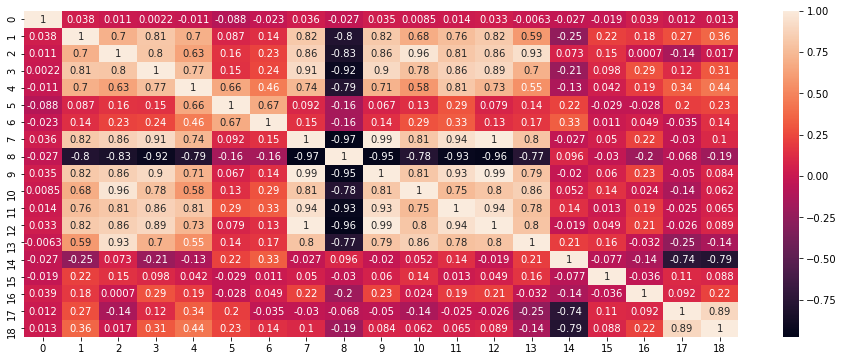

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
sns.heatmap(X_train_pd.corr(), annot=True)

<AxesSubplot:>

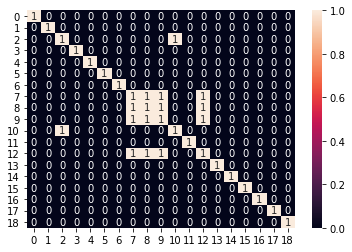

In [7]:
# выделим графически те признаки, которые имеют корреляцию выше 0.95
threshold = 0.95
sns.heatmap(abs(corr_matr) > threshold, annot=True)

Видим, что достаточно высокая корреляция у множества признаков. Обратившись к матрице корреляций (см. выше), можем увидеть, что коррелируют признаки

- 10 и 2 (оставим 2)
- 7, 8, 9, 12 (оставим 7)

Можем дропнуть все, кроме одного из каждой категории. 

In [8]:
X_test_pd = pd.DataFrame(X_test)

X_test_pd.drop(columns=[8, 9, 10, 12], inplace=True)
X_train_pd.drop(columns=[8, 9, 10, 12], inplace=True)

Также поглядим на балансировку:

In [9]:
uni, count = np.unique(y_train, return_counts=True)
dict(zip(uni, count))

{'bus': 138, 'opel': 142, 'saab': 132, 'van': 137}

Видим, что метки сбалансированы, однако они имеют тип объекта:

In [10]:
y_train.dtype

dtype('O')

Заменим метки со стрингов на числовые:

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
new_labels = le.fit_transform(y_train)

y_train = new_labels
y_train

array([3, 2, 2, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 1, 3, 0, 3, 1, 0, 1, 2, 2,
       0, 3, 1, 1, 3, 1, 2, 2, 3, 2, 2, 1, 2, 1, 1, 3, 3, 3, 0, 3, 3, 1,
       3, 1, 3, 0, 2, 1, 0, 0, 0, 1, 3, 1, 3, 2, 1, 0, 2, 1, 0, 0, 1, 2,
       2, 2, 1, 1, 1, 0, 3, 1, 3, 3, 1, 2, 3, 1, 3, 0, 0, 1, 1, 1, 1, 2,
       1, 2, 1, 3, 0, 1, 3, 0, 0, 3, 3, 3, 2, 1, 0, 3, 3, 0, 2, 1, 1, 3,
       2, 1, 0, 2, 2, 0, 1, 1, 3, 2, 1, 1, 3, 3, 1, 2, 3, 3, 2, 0, 0, 2,
       0, 0, 0, 1, 3, 0, 1, 3, 1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2,
       1, 3, 1, 3, 3, 1, 2, 0, 0, 0, 0, 3, 0, 0, 1, 1, 3, 3, 1, 1, 1, 2,
       3, 0, 3, 3, 0, 1, 1, 3, 2, 3, 3, 0, 0, 1, 2, 0, 3, 2, 0, 3, 3, 0,
       2, 0, 3, 1, 3, 2, 1, 2, 1, 1, 0, 2, 0, 2, 0, 3, 0, 0, 3, 2, 3, 1,
       3, 1, 2, 3, 1, 3, 0, 0, 1, 2, 1, 1, 2, 3, 2, 0, 2, 3, 0, 1, 1, 2,
       2, 3, 0, 3, 1, 0, 3, 1, 2, 3, 1, 1, 2, 0, 2, 3, 2, 1, 2, 3, 2, 2,
       3, 0, 0, 2, 1, 3, 2, 0, 0, 0, 0, 2, 2, 3, 0, 2, 1, 0, 2, 0, 3, 3,
       1, 3, 0, 2, 2, 2, 1, 2, 1, 2, 2, 3, 3, 1, 1,

In [12]:
test_labels = le.fit_transform(y_test)

y_test = test_labels
y_test

array([1, 2, 1, 2, 1, 1, 3, 3, 3, 2, 1, 2, 2, 1, 2, 1, 2, 3, 2, 0, 3, 3,
       0, 2, 2, 3, 0, 2, 1, 2, 2, 2, 2, 2, 3, 0, 0, 1, 2, 2, 2, 1, 2, 0,
       2, 2, 0, 2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 3, 3, 1, 2, 2, 2, 3, 3, 3,
       0, 0, 2, 1, 3, 3, 0, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 0, 2, 1, 0, 2,
       2, 2, 0, 2, 2, 3, 1, 3, 0, 3, 3, 0, 1, 1, 0, 2, 0, 0, 3, 1, 2, 3,
       1, 0, 2, 3, 1, 1, 2, 0, 0, 3, 1, 1, 0, 1, 2, 2, 2, 0, 2, 3, 2, 1,
       2, 2, 1, 3, 0, 0, 0, 2, 2, 1, 0, 2, 3, 2, 2, 3, 2, 1, 2, 2, 2, 2,
       0, 0, 3, 1, 0, 1, 3, 0, 1, 2, 2, 3, 3, 3, 3, 0, 1, 0, 0, 1, 2, 0,
       3, 3, 0, 3, 2, 2, 0, 1, 3, 0, 1, 0, 3, 1, 0, 0, 3, 1, 2, 3, 1, 2,
       0, 0, 0, 2, 3, 1, 0, 2, 0, 1, 0, 0, 1, 2, 1, 1, 1, 2, 3, 1, 1, 1,
       0, 0, 1, 2, 0, 3, 0, 0, 0, 3, 3, 1, 3, 0, 0, 3, 0, 2, 0, 0, 1, 0,
       1, 0, 2, 1, 3, 1, 2, 1, 1, 3, 3, 3, 0, 3, 2, 3, 0, 2, 0, 3, 0, 3,
       3, 1, 0, 1, 1, 3, 0, 2, 0, 1, 1, 1, 3, 2, 0, 0, 2, 0, 0, 0, 3, 3,
       0, 1, 2, 1, 1, 1, 2, 3, 3, 1, 0])

Мы видели характеристики каждой фичи выше в `describe()`. Посмотрим на их распределение визуально:

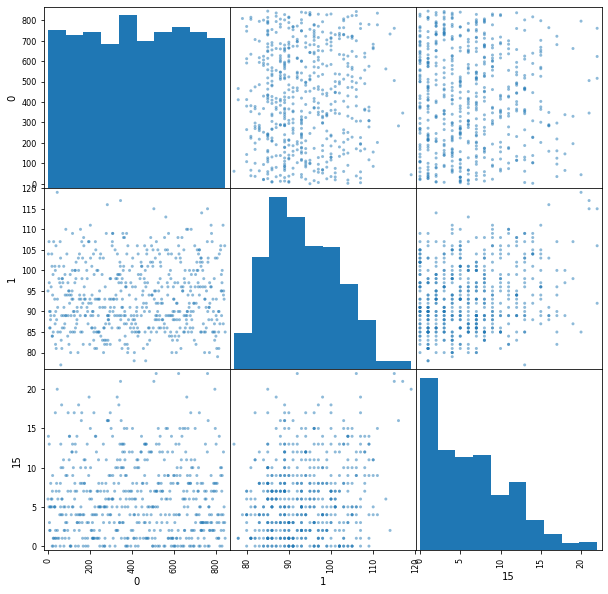

In [13]:
from pandas.plotting import scatter_matrix

scatter_matrix(X_train_pd[[0, 1, 15]], figsize=(10, 10))
plt.show()

Видим большую разницу в порядках значений. Поэтому заскейлим данные:

In [14]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train_pd)
X_test_scaled = ss.fit_transform(X_test_pd)

In [15]:
train_columns = X_train_pd.columns
test_columns = X_test_pd.columns

X_train_pd = pd.DataFrame(X_train_scaled)
X_test_pd = pd.DataFrame(X_test_scaled)

X_train_pd.columns = train_columns
X_test_pd.columns = test_columns

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [172]:
lr = LogisticRegression(multi_class='multinomial',
                       solver='saga',
                       tol=1e-3,
                       max_iter=500)
grid_para = {'penalty': ['l1', 'l2'],
    'C': np.linspace(1, 1, 1000)}

logreg = GridSearchCV(lr, grid_para, cv=3)
logreg_res = logreg.fit(X_train_pd, y_train)
logreg_res.best_estimator_

LogisticRegression(max_iter=500, multi_class='multinomial', penalty='l1',
                   solver='saga', tol=0.001)

In [176]:
logreg_res.best_params_['C']

1.0

In [177]:
logreg_res.best_params_['penalty']

'l1'

In [173]:
from sklearn.metrics import f1_score, accuracy_score, classification_report

y_pred = logreg_res.predict(X_test_pd)
print('f1 score: ', f1_score(y_test, y_pred, average='macro'))
print('accuracy: ', accuracy_score(y_test, logreg.predict(X_test_pd)))

f1 score:  0.767689981737257
accuracy:  0.7676767676767676


In [174]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        80
           1       0.61      0.57      0.59        70
           2       0.68      0.62      0.65        85
           3       0.87      0.98      0.92        62

    accuracy                           0.77       297
   macro avg       0.76      0.78      0.77       297
weighted avg       0.76      0.77      0.76       297



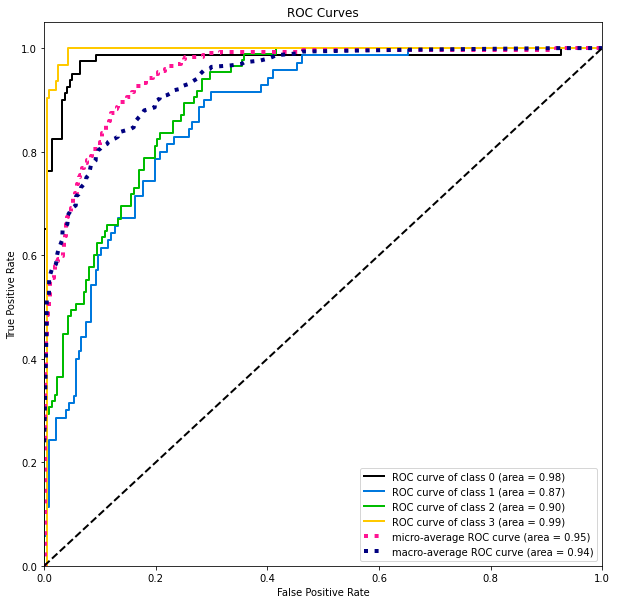

In [175]:
from scikitplot.metrics import plot_roc

plot_roc(y_test, logreg.predict_proba(X_test_pd), figsize=(10, 10))
plt.show()

AUC >= 0.87, выглядит хорошо!!!

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [21]:
from sklearn.decomposition import PCA

pca = PCA()
pca_results = pca.fit(X_train_pd)

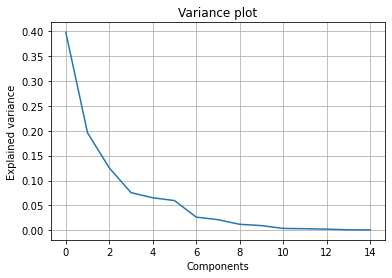

In [22]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Components')
plt.ylabel('Explained variance')
plt.title('Variance plot')
plt.grid(':')
plt.show()

Видно, что достаточно 10 компонент, чтобы охрактеризовать выборку.

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

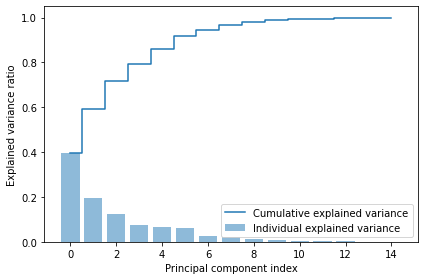

In [23]:
exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [24]:
cumsum_understanding = pd.DataFrame(cum_sum_eigenvalues, index=range(1, len(cum_sum_eigenvalues) + 1))
cumsum_understanding

,0
1,0.397735
2,0.593415
3,0.718800
4,0.794430
5,0.859739
6,0.919463
7,0.945961
8,0.967301
9,0.979350
10,0.988822


0.99% данных описывают 11 компонент. Оставим 11 штук.

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [25]:
pca = PCA(n_components=11, random_state=42)
X_train_pca = pca.fit_transform(X_train_pd)
X_test_pca = pca.transform(X_test_pd)

In [89]:
from sklearn.linear_model import LogisticRegressionCV

lr1 = LogisticRegressionCV(multi_class='multinomial',
                       solver='saga',
                       tol=1e-3,
                       max_iter=500, cv=5)

grid_parameters = {'penalty': ['l1', 'l2'],
    'Cs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 50, 100]}

logreg2 = GridSearchCV(lr1, grid_parameters, scoring="f1_weighted", n_jobs=-1, verbose=20)
logreg3 = GridSearchCV(lr1, grid_parameters, scoring="accuracy", n_jobs=-1, verbose=20)

In [90]:
logreg2.fit(X_train_pca, y_train)
logreg3.fit(X_train_pca, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(estimator=LogisticRegressionCV(cv=5, max_iter=500,
                                            multi_class='multinomial',
                                            solver='saga', tol=0.001),
             n_jobs=-1,
             param_grid={'Cs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 50, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=40)

Посмотрим, какие параметры получились при подборе по `f1_weighted`:

In [91]:
logreg2.best_params_['penalty']

'l1'

In [92]:
logreg2.best_params_['Cs']

5

По `accuracy` получились следующие параметры:

In [93]:
logreg3.best_params_['penalty']

'l1'

In [95]:
logreg3.best_params_['Cs']

3

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

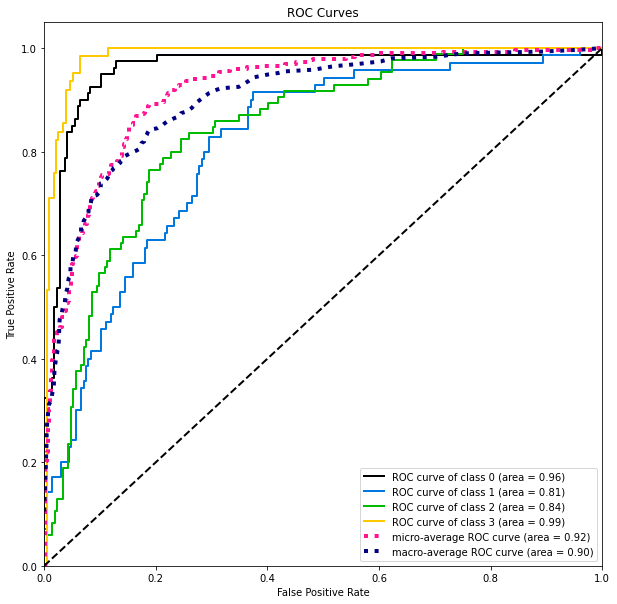

In [96]:
plot_roc(y_test, logreg2.predict_proba(X_test_pca), figsize=(10, 10))

Видим, что с PCA результаты становятся немного хуже (AUC >= 0.81), однако не критично.

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [97]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc_params = {'max_depth': np.arange(1, 100)}

tree_acc = GridSearchCV(dtc, dtc_params, scoring = 'accuracy')
tree_acc.fit(X_train_pca, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='accuracy')

In [98]:
tree_f1 = GridSearchCV(dtc, dtc_params, scoring = 'f1_weighted')
tree_f1.fit(X_train_pca, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='f1_weighted')

In [99]:
accuracy_score(y_test, tree_acc.predict(X_test_pca))

0.6262626262626263

In [100]:
tree_acc.best_params_['max_depth']

36

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

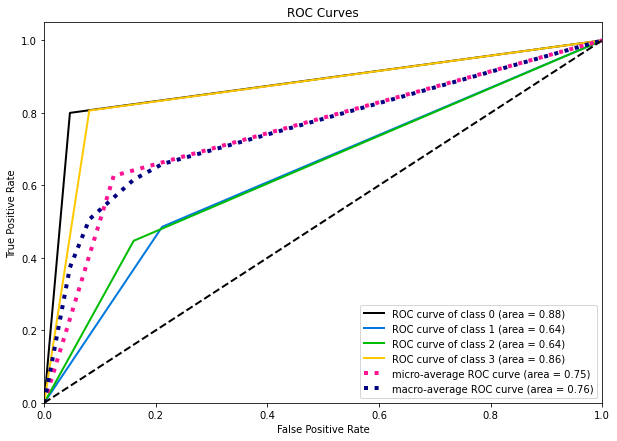

In [101]:
plot_roc(y_test, tree_acc.predict_proba(X_test_pca), figsize=(10, 7))

In [102]:
f1_score(y_test, tree_f1.predict(X_test_pca), average="weighted")

0.6295164721892684

In [103]:
tree_f1.best_params_['max_depth']

90

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

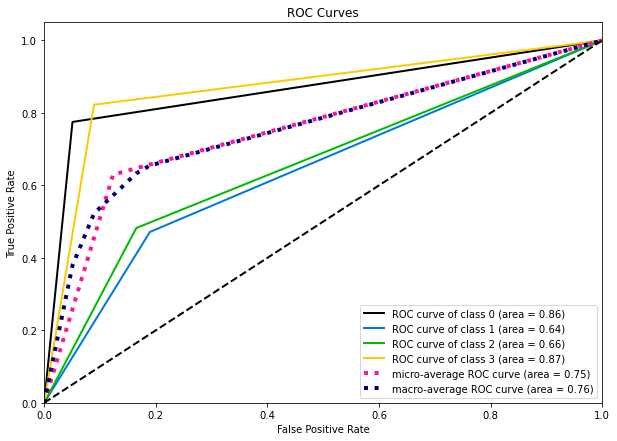

In [104]:
plot_roc(y_test, tree_f1.predict_proba(X_test_pca), figsize=(10, 7))

Видим, что качество у деревьев хуже, чем у логистической регрессии. То есть не обязательно всегда использовать более сложный метод, бывает, что простой работает хорошо.
Видим также, что по f1_score нашлись чуть более удачные параметры, которые показывают более хорошее качество.

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

Возьмем лучшие параметры, которые мы посчитали выше, и пройдемся по количеству ансамблей.

In [105]:
best_logreg_f1 = LogisticRegressionCV(multi_class='multinomial',
                       solver='saga',
                       tol=1e-3,
                       max_iter=500, penalty='l1', Cs=5)

best_tree_f1 = DecisionTreeClassifier(max_depth=90)

best_logreg_acc = LogisticRegressionCV(multi_class='multinomial',
                       solver='saga',
                       tol=1e-3,
                       max_iter=500, penalty='l1', Cs=3)

best_tree_acc = DecisionTreeClassifier(max_depth=36)

In [126]:
from sklearn.ensemble import BaggingClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning

tree_acc = []
tree_f1 = []

logreg_acc = []
logreg_f1 = []

for i in range(2, 100, 5):
    
    # сначала f1 часть
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        clf1 = BaggingClassifier(base_estimator=best_logreg_f1, n_estimators=i, bootstrap=False)
        clf1.fit(X_train_pca, y_train)
        logreg_f1.append(f1_score(y_test, clf1.predict(X_test_pca), average="macro"))
    
    clf2 = BaggingClassifier(base_estimator=best_tree_f1, n_estimators=i)
    clf2.fit(X_train_pca, y_train)
    tree_f1.append(f1_score(y_test, clf2.predict(X_test_pca), average="macro"))
    
    # затем acc 
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        clf3 = BaggingClassifier(base_estimator=best_logreg_acc, n_estimators=i)
        clf3.fit(X_train_pca, y_train)
        logreg_acc.append(accuracy_score(y_test, clf3.predict(X_test_pca)))
    
    clf4 = BaggingClassifier(base_estimator=best_tree_acc, n_estimators=i)
    clf4.fit(X_train_pca, y_train)
    tree_acc.append(accuracy_score(y_test, clf4.predict(X_test_pca)))

In [127]:
print("Best tree_acc: " + str(np.arange(2, 100, 5)[np.argmax(tree_acc)]))
print("Best tree_f1: " + str(np.arange(2, 100, 5)[np.argmax(tree_f1)]))
print("Best logreg_acc: " + str(np.arange(2, 100, 5)[np.argmax(logreg_acc)]))
print("Best logreg_f1: " + str(np.arange(2, 100, 5)[np.argmax(logreg_f1)]))

Best tree_acc: 97
Best tree_f1: 77
Best logreg_acc: 2
Best logreg_f1: 2


Изобразим полученные результаты:

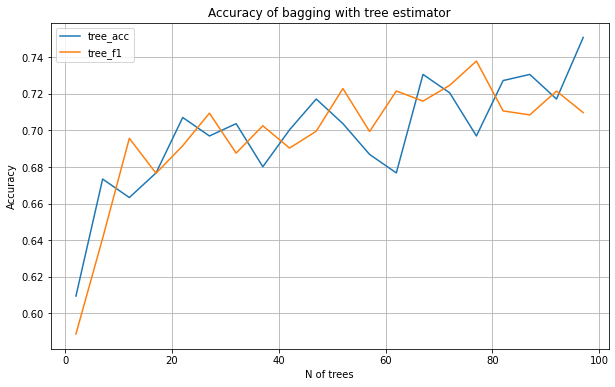

In [128]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(2, 100, 5), tree_acc, label="tree_acc")
plt.plot(np.arange(2, 100, 5), tree_f1, label="tree_f1")
plt.title("Accuracy of bagging with tree estimator")
plt.xlabel("N of trees")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

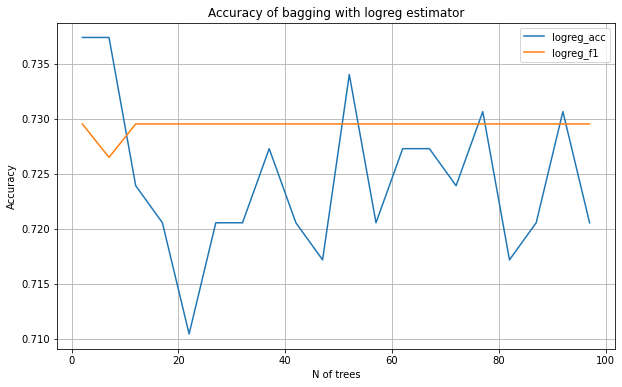

In [129]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(2, 100, 5), logreg_acc, label="logreg_acc")
plt.plot(np.arange(2, 100, 5), logreg_f1, label="logreg_f1")
plt.title("Accuracy of bagging with logreg estimator")
plt.xlabel("N of trees")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

У меня не получилось сделать так, чтобы беггинг не выдавал ошибку сходимости на логреге, поэтому второму графику верить не нужно. 

Однако по полученным результатам можно сказать, что для деревьев чем больше эстиматоров в ансамбле, тем лучше, а у логрега - как будто без разницы, все равно ничего не работает и общее качество небольшое по сравнению с чистым логрегом. (беггинг к логрегу не применяем☝🏻☝🏻☝🏻)

Кажется, что параметры из 2.5 подобраны как минимум неплохо, поскольку с помощью ансамблевого подхода получилось улучшить качество уже на совсем небольшом количестве ансамблей и с увеличением их количества качество только увеличивается.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [144]:
from sklearn.ensemble import RandomForestClassifier

forest_acc = []
forest_f1 = []

for i in range(1, 100, 5):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train_pca, y_train)
    forest_acc.append(accuracy_score(y_test, rfc.predict(X_test_pca)))
    forest_f1.append(f1_score(y_test, rfc.predict(X_test_pca), average="macro"))

In [145]:
print("best_acc = " + str(np.arange(1, 100, 5)[np.argmax(forest_acc)]))
print("best_f1 = " + str(np.arange(1, 100, 5)[np.argmax(forest_f1)]))

best_acc = 76
best_f1 = 76


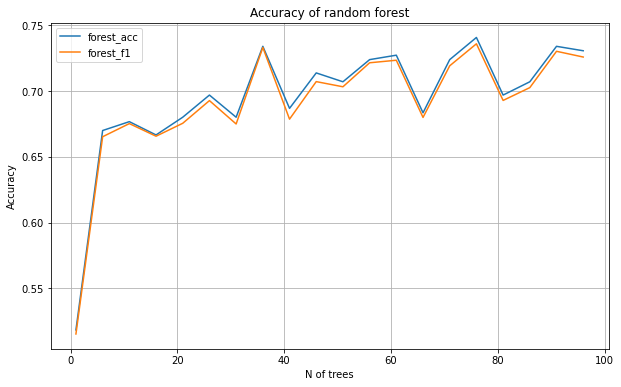

In [146]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 100, 5), forest_acc, label="forest_acc")
plt.plot(np.arange(1, 100, 5), forest_f1, label="forest_f1")
plt.title("Accuracy of random forest")
plt.xlabel("N of trees")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

Можем наблюдать примерно такую же тенденцию, как и у деревьев в беггинге. С увеличением количества деревьев в ансамбле потихоньку начинает увеличиваться качество.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

Здесь вернемся к данным, которые были в начале (до PCA). Просто интересно, что они покажут. 

In [149]:
from sklearn.utils import shuffle

new_X_train, new_y_train = shuffle(X_train_pd, y_train)

new_df = np.concatenate((new_X_train, new_y_train.reshape(new_y_train.shape[0], 1)), axis=1)
splitted = np.array_split(new_df, 10)

In [178]:
logreg_f1 = []
dt_f1 = []
rf_f1 = []

logreg_acc = []
dt_acc = []
rf_acc = []

for i in range(9):
    this_train = np.concatenate([splitted[j] for j in range(i + 1)])
    this_test = np.concatenate([splitted[j] for j in range(i + 1, 10)])
    this_X_train = this_train[:,:-1]
    this_y_train = this_train[:, -1]
    this_X_test = this_test[:, :-1]
    this_y_test = this_test[:, -1]
    
    logreg = LogisticRegression(multi_class='multinomial',
                       solver='saga',
                       tol=1e-3,
                       max_iter=500, C=1, penalty='l1')
    logreg.fit(this_X_train, this_y_train)
    logreg_f1.append(f1_score(this_y_test, logreg.predict(this_X_test), average="macro"))
    logreg_acc.append(accuracy_score(this_y_test, logreg.predict(this_X_test)))
    
    destree = DecisionTreeClassifier(max_depth=90)
    destree.fit(this_X_train, this_y_train)
    dt_f1.append(f1_score(this_y_test, destree.predict(this_X_test), average="macro"))
    dt_acc.append(accuracy_score(this_y_test, destree.predict(this_X_test)))
    
    randforest = RandomForestClassifier(n_estimators=76)
    randforest.fit(this_X_train, this_y_train)
    rf_f1.append(f1_score(this_y_test, randforest.predict(this_X_test), average="macro"))
    rf_acc.append(accuracy_score(this_y_test, randforest.predict(this_X_test)))

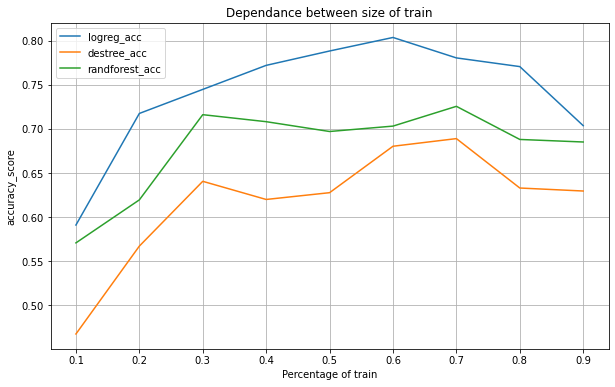

In [180]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0.1, 1, 0.1), logreg_acc, label="logreg_acc")
plt.plot(np.arange(0.1, 1, 0.1), dt_acc, label="destree_acc")
plt.plot(np.arange(0.1, 1, 0.1), rf_acc, label="randforest_acc")
plt.title("Dependance between size of train")
plt.xlabel("Percentage of train")
plt.ylabel("accuracy_score")
plt.legend()
plt.grid()
plt.show()

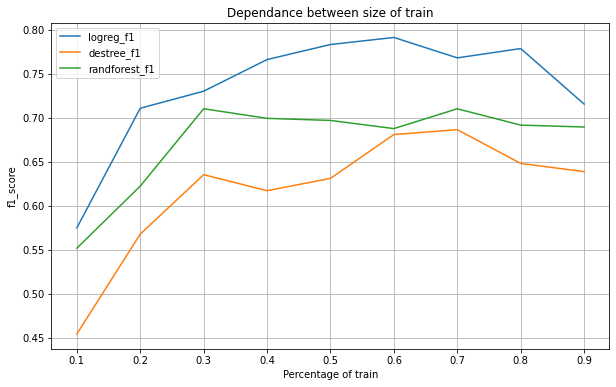

In [181]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0.1, 1, 0.1), logreg_f1, label="logreg_f1")
plt.plot(np.arange(0.1, 1, 0.1), dt_f1, label="destree_f1")
plt.plot(np.arange(0.1, 1, 0.1), rf_f1, label="randforest_f1")
plt.title("Dependance between size of train")
plt.xlabel("Percentage of train")
plt.ylabel("f1_score")
plt.legend()
plt.grid()
plt.show()

Можем заметить, что происходит переобучение где-то после 70% выборки. Для линейной регрессии достаточно 60% трейна, при этом деревьям и лесу нужно 70%, чтобы показать наилучший результат. 